<a href="https://colab.research.google.com/github/Delight-bot/Delight-bot/blob/main/ASRI__Introduction_to_using_basic_statistics_on_Pandas_Dataframes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to using basic regression on Pandas Dataframes
Data scientists work with large amounts of data and need to extract insights from that data. One of the most common tasks in data science is to predict a continuous variable based on one or more features.

Linear regression is a popular tool for this purpose, and usings pandas, makes it simple to perform linear regression on your data.

I'm going to re-use a data set that we have used before to illustrate how to do linear regression, the results won't be particularly useful, but we will be able to learn the technique with familiar data. After learning the method you will be able to use the method on your data sets. We will repeat some of the EDA that we have already done to gather the information that we will need to determin which columns we should use in the regression analysis.

We'll need tp begin by linking our Google Drive so that we can load the data into a dataframe.

#Connecting your Google Drive to your Colab notebook

First, locate the picture of the folder on the left hand side of the web page, and then click on it with your mouse or trackpad. This opens a panel that contains some folders.

Next locate the symbols next to the magnifying glass, the up arrow allows direct uploads if you click on itm the folder with the drive symbol will begin the process of linking your Google drive, you will be asked for permission, you might be required to re-authenticate with your account password.

You will see a message that your Google drive is being mounted, when the process is complete you will see a new folder named "drive", click on the triagle to the left of the folder and you will see the folder "MyDrive" this is your Google drive, click on the triangle and navigate to the directory that contains the data file that you want to load into a pandas dataframe.

I'm going to use housing price data, a file that should already have loaded on your Google Drive.

Let your cursor hover over the file until three dots appear on the right side of the panel, then click on the three dots, and then select "Copy path" this will copy the information about the location of the file to the clipboard. You will then be able to paste this path to the pandas read command. You can past using "Command+V" on a Mac or "Ctrl+V" on a Windows machine.

Let's read in the file.


In [ ]:
#The code needed is first import pandas, then use pd.read, and replace paste
#here with the path that you got from the instructions above.
import pandas as pd
df = pd.read_csv('paste here')
type(df)
#we'll name the data frame Housing, and use the next code block

In [4]:
import pandas as pd
quakes = pd.read_csv('/content/drive/MyDrive/earth - emdat-delight.csv')
quakes

,Dis No,Year,Disaster Type,Country,Region,Continent,Total Deaths,No Injured,No Affected,Total Affected,CPI
0,1993-0184-CRI,1993,Earthquake,Costa Rica,Central America,Americas,3.0,40.0,200.0,240.0,49.361332
1,1993-9585-CUB,1993,Earthquake,Cuba,Caribbean,Americas,NaN,NaN,NaN,NaN,49.361332
2,1994-0058-BOL,1994,Earthquake,Bolivia (Plurinational State of),South America,Americas,5.0,NaN,NaN,NaN,50.648403
3,1994-0059-COL,1994,Earthquake,Colombia,South America,Americas,271.0,158.0,12461.0,37416.0,50.648403
4,1994-0057-AFG,1994,Earthquake,Afghanistan,Southern Asia,Asia,160.0,330.0,100000.0,100330.0,50.648403
...,...,...,...,...,...,...,...,...,...,...,...
1592,2023-0091-SYR,2023,Earthquake,Syrian Arab Republic,Western Asia,Asia,NaN,470.0,NaN,470.0,NaN
1593,2023-0107-SYR,2023,Earthquake,Syrian Arab Republic,Western Asia,Asia,NaN,150.0,NaN,150.0,NaN
1594,2023-0237-TJK,2023,Earthquake,Tajikistan,Central Asia,Asia,NaN,3.0,2202.0,2205.0,NaN
1595,2023-0091-TUR,2023,Earthquake,Turkey,Western Asia,Asia,6.0,294.0,NaN,294.0,NaN


We'll do some basic EDA

In [5]:
#First we'll look at the head and tail.
quakes

,Dis No,Year,Disaster Type,Country,Region,Continent,Total Deaths,No Injured,No Affected,Total Affected,CPI
0,1993-0184-CRI,1993,Earthquake,Costa Rica,Central America,Americas,3.0,40.0,200.0,240.0,49.361332
1,1993-9585-CUB,1993,Earthquake,Cuba,Caribbean,Americas,NaN,NaN,NaN,NaN,49.361332
2,1994-0058-BOL,1994,Earthquake,Bolivia (Plurinational State of),South America,Americas,5.0,NaN,NaN,NaN,50.648403
3,1994-0059-COL,1994,Earthquake,Colombia,South America,Americas,271.0,158.0,12461.0,37416.0,50.648403
4,1994-0057-AFG,1994,Earthquake,Afghanistan,Southern Asia,Asia,160.0,330.0,100000.0,100330.0,50.648403
...,...,...,...,...,...,...,...,...,...,...,...
1592,2023-0091-SYR,2023,Earthquake,Syrian Arab Republic,Western Asia,Asia,NaN,470.0,NaN,470.0,NaN
1593,2023-0107-SYR,2023,Earthquake,Syrian Arab Republic,Western Asia,Asia,NaN,150.0,NaN,150.0,NaN
1594,2023-0237-TJK,2023,Earthquake,Tajikistan,Central Asia,Asia,NaN,3.0,2202.0,2205.0,NaN
1595,2023-0091-TUR,2023,Earthquake,Turkey,Western Asia,Asia,6.0,294.0,NaN,294.0,NaN


In [6]:
# Then we'll get the basic information about the data frame.
quakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dis No          1597 non-null   object 
 1   Year            1597 non-null   int64  
 2   Disaster Type   1597 non-null   object 
 3   Country         1597 non-null   object 
 4   Region          1597 non-null   object 
 5   Continent       1597 non-null   object 
 6   Total Deaths    786 non-null    float64
 7   No Injured      761 non-null    float64
 8   No Affected     995 non-null    float64
 9   Total Affected  1306 non-null   float64
 10  CPI             1579 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 137.4+ KB


Next we'll rerun the correlation analysis to see which columns we should consider running regression on.

In [7]:
quakes.corr(method='pearson', min_periods=1, numeric_only=bool)

,Year,Total Deaths,No Injured,No Affected,Total Affected,CPI
Year,1.000000,0.038229,0.024025,0.015448,0.033049,0.944976
Total Deaths,0.038229,1.000000,0.830924,0.271926,0.246073,0.032888
No Injured,0.024025,0.830924,1.000000,0.761315,0.769693,0.014495
No Affected,0.015448,0.271926,0.761315,1.000000,0.999978,0.013795
Total Affected,0.033049,0.246073,0.769693,0.999978,1.000000,0.033446
CPI,0.944976,0.032888,0.014495,0.013795,0.033446,1.000000


from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Total Deaths'].plot(kind='hist', bins=20, title='Total Deaths')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['No Injured'].plot(kind='hist', bins=20, title='No Injured')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['No Affected'].plot(kind='hist', bins=20, title='No Affected')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Year', y='Total Deaths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Total Deaths', y='No Injured', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='No Injured', y='No Affected', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='No Affected', y='Total Affected', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Total Deaths']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Total Deaths')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['No Injured']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('No Injured')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['No Affected']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('No Affected')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Total Affected']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Total Affected')

from matplotlib import pyplot as plt
_df_12['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Total Deaths'].plot(kind='line', figsize=(8, 4), title='Total Deaths')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['No Injured'].plot(kind='line', figsize=(8, 4), title='No Injured')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['No Affected'].plot(kind='line', figsize=(8, 4), title='No Affected')
plt.gca().spines[['top', 'right']].set_visible(False)

I always like to introduce something new, so having done the correlation analysis, I'm going to show you how to produce a heat map instead. You might prefer to use a heat map in a presentation.

To do this all we need to do is to put the correlation matrix in a variable, and import Seabornand Matplotlib, the code follows

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

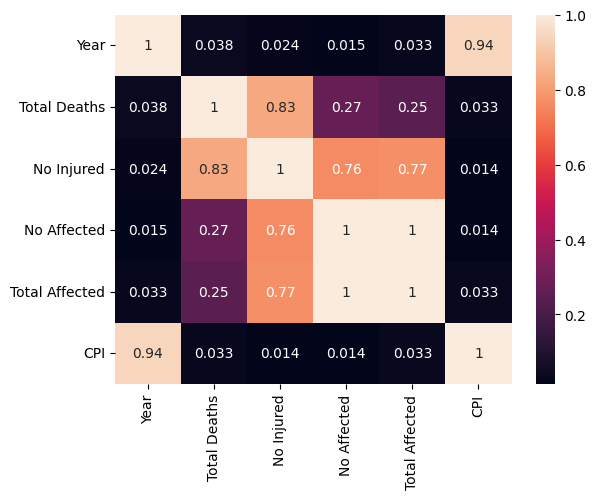

In [13]:
# First calculate the correlation matrix
corr=quakes.corr(method='pearson', min_periods=1, numeric_only=bool)
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
plt.savefig("sinecosine.png")
files.download("sinecosine.png")
# Create the heatmap
sns.heatmap(corr, annot=True)
plt.show()

As you observe, the code produces a heatmap with the correlation coefficients between each pair of numerical columns columns in the dataframe. The color of each cell in the heatmap represents the strength of the correlation, with red indicating a strong positive correlation, blue indicating a strong negative correlation, and white indicating no correlation.

The annot=True argument in the sns.heatmap() function tells Seaborn to annotate each cell in the heatmap with the corresponding correlation coefficient. This can be helpful for understanding the strength and direction of the correlations between the different variables in the dataframe.

You can also customize the appearance of the heatmap by passing additional arguments to the sns.heatmap() function. For example, you can change the color palette, the size of the cells, and the font size of the annotations.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

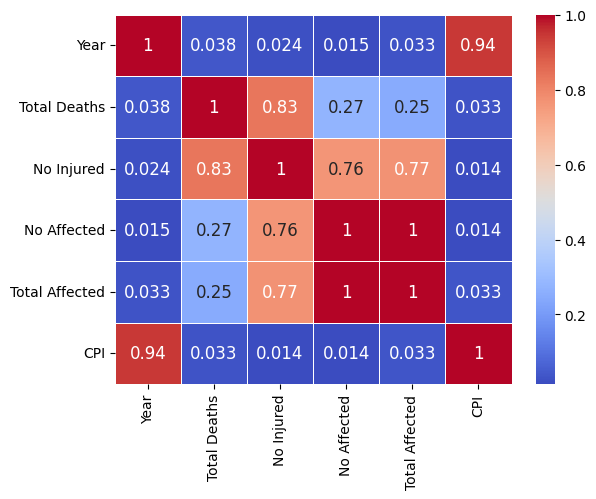

In [15]:
# Here is an example of a customized heat map
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={'fontsize': 12})
from google.colab import files
plt.savefig("sinecosine.png")
files.download("sinecosine.png")
plt.show()

This heatmap uses the "coolwarm" color palette, which ranges from blue to red. The linewidths of the cell borders have been set to 0.5, and the font size of the annotations has been set to 12.

You can use heatmaps to visualize the correlations between variables in any Pandas dataframe. This is helpful for identifying relationships between variables that you may not have been aware of.






#Now let's look at how to do a regression analysis.
Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables.

The goal of linear regression is to find the best line that fits the data in a way that minimizes the error between the predicted values and the actual values.

In its simplest form, linear regression can be represented by: $$y=mx+b$$. Here, where $y$ is the dependent variable, $x$ is the independent variable, $m$ is the slope of the line, and $b$ is the $y$-intercept.



#Linear Regression with a pandas dataframe

Performing linear regression with pandas is a simple process that can be broken down into four steps:


1.   Load the data into a pandas dataframe

1.   Prepare the data for linear regression by separating the dependent variable and the independent variable(s)

1. Create a linear regression model using the sklearn library

1.   Train the model and evaluate its performance

We have already done item 1, we can determine which columns to run regression analyses by looking at the correrlation matrix or the heat map. Let's choose "price" and "area".

Let's predict "price" based on "area", so we'll prepare the data





In [42]:
x = quakes[['Year']]
y = quakes['Total Deaths']

In [33]:
import numpy as np
quakes.replace(np.nan, "0", inplace = True)

In [41]:
from typing_extensions import LiteralString
new_var = quakes["Total Deaths"].fillna(0)
new_var

0         3.0
1           0
2         5.0
3       271.0
4       160.0
        ...  
1592        0
1593        0
1594        0
1595      6.0
1596      1.0
Name: Total Deaths, Length: 1597, dtype: object

#Creating a Linear Regression Model using sklearn
Well create a linear regression model using the sklearn library.

sklearn is a popular machine learning library that provides tools for data preprocessing, model selection, and evaluation.

The necessary code follows.

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
quakes["Total Deaths"].value_counts()

Total Deaths
0           811
1.0         106
2.0          73
3.0          51
4.0          30
           ... 
165708.0      1
26796.0       1
2266.0        1
79.0          1
4500.0        1
Name: count, Length: 210, dtype: int64

In [31]:
import numpy as np
quakes.replace(np.nan, "0", inplace = True)

Now we need to train the model and evaluate its performance.

We'll train the model using the fit method and evaluate it's performance using the score method, which returns the R-squared value.

In [43]:
# Train the model
model.fit(x, y)

LinearRegression()

In [44]:
# Evaluate the model
r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.00015503581401699051


As we expected, this isn't a very good model.

The R-squared value measures how well the linear regression model fits the data, ranging from 0 to 1, where 1 indicates a perfect fit.

You can learn more about linear models [here](https://scikit-learn.org/stable/modules/linear_model.html). You can learn more about using sklearn in Colab [here](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb#scrollTo=TG1Jwe230kri).

This has been a quick introduction, but if you need to do regression, this is a good starting point.

Let's see how poor the predictions are!

In [45]:
#We have done the fit, so let's do the prediction using x as a parameter
linear_regressor = LinearRegression().fit(x, y)
y_pred = linear_regressor.predict(x)

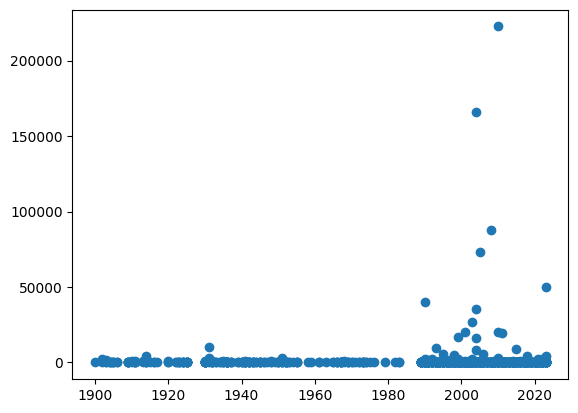

In [46]:
#Next we'll produce the scatterplot
plt.scatter(x, y)

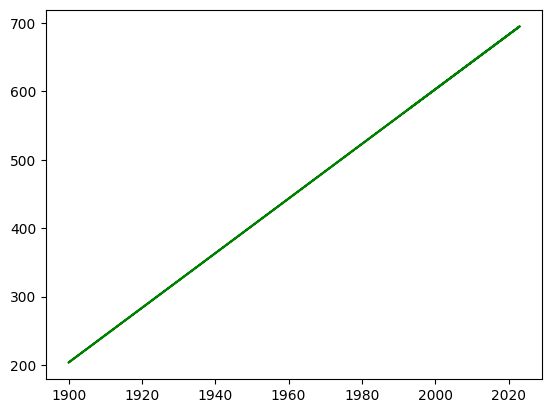

In [47]:
#And now well nd a line with x and our predicted value, y_pred
plt.plot(x, y_pred, color='green')

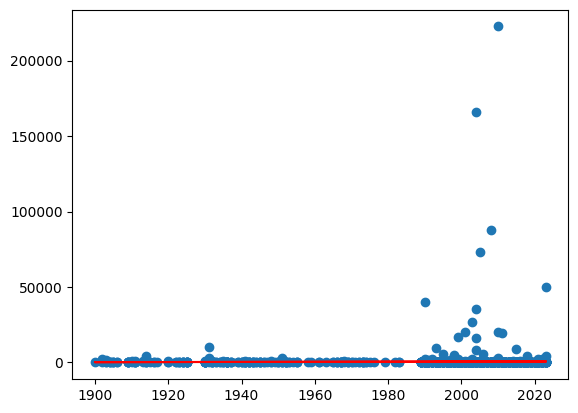

In [48]:
#Finally we'll look at the composite plot
plt.scatter(x, y);plt.plot(x, y_pred, color='red')
plt.show()

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [61]:
X_Year = quakes[['Year']]
y_TotalDeaths = quakes["Total Deaths"]


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Year, y_TotalDeaths, test_size=0.2, random_state=1)

In [66]:
model = LinearRegression()
model.fit(X_Year, y_TotalDeaths)

LinearRegression()

In [68]:
y_pred = model.predict(X_test)

In [72]:
# Convert 'y_TotalDeaths' to numeric, handling potential errors
y_TotalDeaths = pd.to_numeric(y_TotalDeaths, errors='coerce')

# Drop rows with missing values after conversion
y_TotalDeaths = y_TotalDeaths.dropna()

# Re-fit the model with the numeric target variable
model.fit(X_Year.loc[y_TotalDeaths.index], y_TotalDeaths)

GaussianNB()

In [76]:
GaussianNB()

GaussianNB()

In [73]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 178550409.9923951


In [74]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_Year, y_TotalDeaths)                  # 3. fit model to data
y_model = model.predict(X_test)             # 4. predict on new data

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

TypeError: '<' not supported between instances of 'float' and 'str'

#Some basic statistics using Pandas dataframes

Calculating the basic statistics on the columns of pandas dataframes is straightforward. We'll continue to use the same dataframe, that we used above, that data frame is called "Housing".

Statistical operations in general exclude missing data.

In [49]:
#First we'll calculate a mean
#What is the average number of bedrooms in the houses in the data set
quakes["Total Deaths"].mean()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
#What is the median number of bedrooms in the data set
Housing["bedrooms"].median()


In [ ]:
#What is the mode of the number of bathrooms in the data set
Housing["bathrooms"].mode()

In [ ]:
#You can get multiple quantities for multiple columns
Housing[["price", "bedrooms", "bathrooms"]].describe()

In [ ]:
#Here' how to do the sample standard deviation
Housing[["bedrooms", "bathrooms"]].std()

In [ ]:
#The correct way to access multiple columns in a DataFrame
#is to pass a list of column names to the indexing operator,
# like this: Housing[["bedrooms", "bathrooms"]].std(). If we wanted
# to do a single culmn, the code is this
Housing["bedrooms"].std()

In [50]:
#Here is how to do the variance
quakes["bedrooms"].var()

KeyError: 'bedrooms'

In [ ]:
#Here is the variance of multiple columns
Housing[["bedrooms", "bathrooms", "area"]].var()

In [ ]:
#Here is the standard error of the mean
Housing["bedrooms"].sem()

If you need more statistics, you can look them up in the pandas [documenation](https://pandas.pydata.org/docs/index.html).